# Data Exploration

## Import and Settings

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import dask
import dask.dataframe as dd
import dask.array as da

In [4]:
from scipy import stats
from scipy.stats import chisquare, chi2_contingency, ttest_ind

In [5]:
IMAGE_FOLDER = './img/'

In [6]:
df = dd.read_csv('cleaned_ds.csv')

In [7]:
# allocating columns
category_vars = ['Label', 'Protocol', 'Fwd PSH Flags', 'Bwd PSH Flags', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'dst_port_transformed', 'src_port_transformed']
object_vars = ['Dst IP', 'Flow ID', 'Src IP', 'Timestamp'] #df.select_dtypes(include=['object']).columns
continuous_vars = df.columns[~df.columns.isin(category_vars) & ~df.columns.isin(object_vars)]

---
## Encode Port Numbers

In [8]:
def f(x):
    if x < 1024:
         y= 'System'
    elif x > 1023 and x < 49152:
         y= 'User'
    else :
         y= 'Dynamic' 
    return y

In [9]:
df['dst_port_transformed'] = df['Dst Port'].apply(f,meta=('Dst Port', 'object'))
df['src_port_transformed'] = df['Src Port'].apply(f,meta=('Src Port', 'object'))

---
## Statistics and Visualizations

In [10]:
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,dst_port_transformed,src_port_transformed
0,1739476,172.31.69.25-18.219.193.20-80-37882-6,18.219.193.20,37882,172.31.69.25,80,6,16/02/2018 11:27:29 PM,8660,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,230.946882,8660.000000,0.000000,8660.0,8660.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,32,32,115.473441,115.473441,0.0,0.0,0.000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.00,0.000000,1,0,1,0,-1,225,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos,System,User
1,1822666,172.31.69.28-18.219.9.1-80-63287-6,172.31.69.28,80,18.219.9.1,63287,6,22/02/2018 12:13:52 AM,5829,4,3,935.0,298.0,935.0,0.0,233.75,467.5,298.0,0.0,99.333333,172.050380,211528.564076,1200.892091,971.500000,2104.124973,5260.0,7.0,5822.0,1940.666667,3119.411857,5541.0,46.0,5540.0,2770.0,3521.391770,5260.0,280.0,0,0,92,72,686.224052,514.668039,0.0,935.0,154.125,332.306415,110427.553571,0,1,0,0,0,0,1,1,0.0,176.142857,233.75,99.333333,4,935,3,298,-1,32768,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos,Dynamic,System
2,905739,172.31.69.28-52.14.136.135-80-63095-6,52.14.136.135,63095,172.31.69.28,80,6,22/02/2018 12:14:02 AM,3396,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,588.928151,3396.000000,0.000000,3396.0,3396.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,20,20,294.464075,294.464075,0.0,0.0,0.000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.00,0.000000,1,0,1,0,-1,32738,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos,System,Dynamic
3,1143064,172.31.69.28-18.216.200.189-80-52341-6,18.216.200.189,52341,172.31.69.28,80,6,22/02/2018 12:28:04 AM,2390,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,836.820084,2390.000000,0.000000,2390.0,2390.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,20,20,418.410042,418.410042,0.0,0.0,0.000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.00,0.000000,1,0,1,0,-1,32738,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos,System,Dynamic
4,1934016,172.31.69.28-18.218.55.126-80-57459-6,172.31.69.28,80,18.218.55.126,57459,6,22/02/2018 12:19:45 AM,17362,4,3,935.0,314.0,935.0,0.0,233.75,467.5,314.0,0.0,104.666667,181.287985,71938.716738,403.179357,2893.666667,6770.577661,16711.0,7.0,17355.0,5785.000000,9779.680414,17077.0,38.0,17074.0,8537.0,11559.781659,16711.0,363.0,0,0,92,72,230.388204,172.791153,0.0,935.0,156.125,333.342568,111117.267857,0,1,0,0,0,0,1,1,0.0,178.428571,233.75,104.666667,4,935,3,314,-1,32768,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos,Dynamic,System


In [11]:
df.describe().compute()

,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06,7.568754e+06
mean,3.515079e+06,4.197119e+04,1.005008e+04,9.086321e+00,1.176095e+07,1.321160e+01,6.647811e+00,6.343965e+02,5.263748e+03,2.209256e+02,1.193626e+01,5.826865e+01,8.278302e+01,3.594382e+02,2.861226e+01,1.157600e+02,1.318382e+02,3.305904e+05,3.340046e+04,2.240012e+06,1.141819e+06,5.351995e+06,1.739231e+06,1.114259e+07,2.504126e+06,1.171947e+06,4.847287e+06,1.791540e+06,8.477327e+06,1.026106e+06,1.086964e+06,3.166120e+06,3.527784e+05,4.591496e-02,3.713029e-03,1.733419e+02,1.415146e+02,2.640795e+04,6.995943e+03,1.209230e+01,4.107932e+02,8.237981e+01,1.279576e+02,4.494211e+04,1.395382e-02,9.337970e-02,1.565998e-01,3.090452e-01,3.389403e-01,3.226779e-02,2.867275e-02,1.838884e-01,6.276675e-01,9.519492e+01,5.826865e+01,1.157600e+02,1.321160e+01,6.343965e+02,6.647811e+00,5.263748e+03,4.025176e+03,1.010162e+04,9.428208e+00,1.238154e+01,2.235042e+05,1.145727e+05,3.358220e+05,1.464570e+05,4.156591e+06,1.673299e+05,4.295533e+06,4.001012e+06
std,2.328025e+06,2.311044e+04,1.992598e+04,5.097181e+00,3.074509e+07,1.012580e+03,3.249707e+02,3.163806e+04,6.993760e+05,3.279165e+02,2.416794e+01,7.222867e+01,1.387534e+02,5.186283e+02,5.202417e+01,1.687404e+02,2.066409e+02,7.013734e+06,2.146017e+05,1.047180e+07,3.915776e+06,1.534183e+07,1.037814e+07,3.057151e+07,1.064831e+07,4.409071e+06,1.497442e+07,1.046586e+07,2.686419e+07,4.872741e+06,4.000840e+06,1.115533e+07,4.247038e+06,2.093007e-01,6.082140e-02,9.220094e+03,6.501076e+03,2.002319e+05,6.038288e+04,2.156244e+01,5.429500e+02,1.052091e+02,1.690236e+02,2.295384e+05,1.172992e-01,2.909638e-01,3.634230e-01,4.620999e-01,4.733496e-01,1.767105e-01,1.668851e-01,3.873932e-01,1.190908e+00,1.095174e+02,7.222867e+01,1.687404e+02,1.012580e+03,3.163806e+04,3.249707e+02,6.993760e+05,9.598047e+03,2.120755e+04,9.865184e+02,8.511319e+00,2.980251e+06,1.815748e+06,3.949238e+06,2.506265e+06,1.423200e+07,1.757112e+06,1.453897e+07,1.407000e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

### Correlation Analysis

In [13]:
corr = df[continuous_vars].corr().compute()
corr.to_csv('corr.csv')
# corr = pd.read_csv('corr_1.csv', index_col = 0)

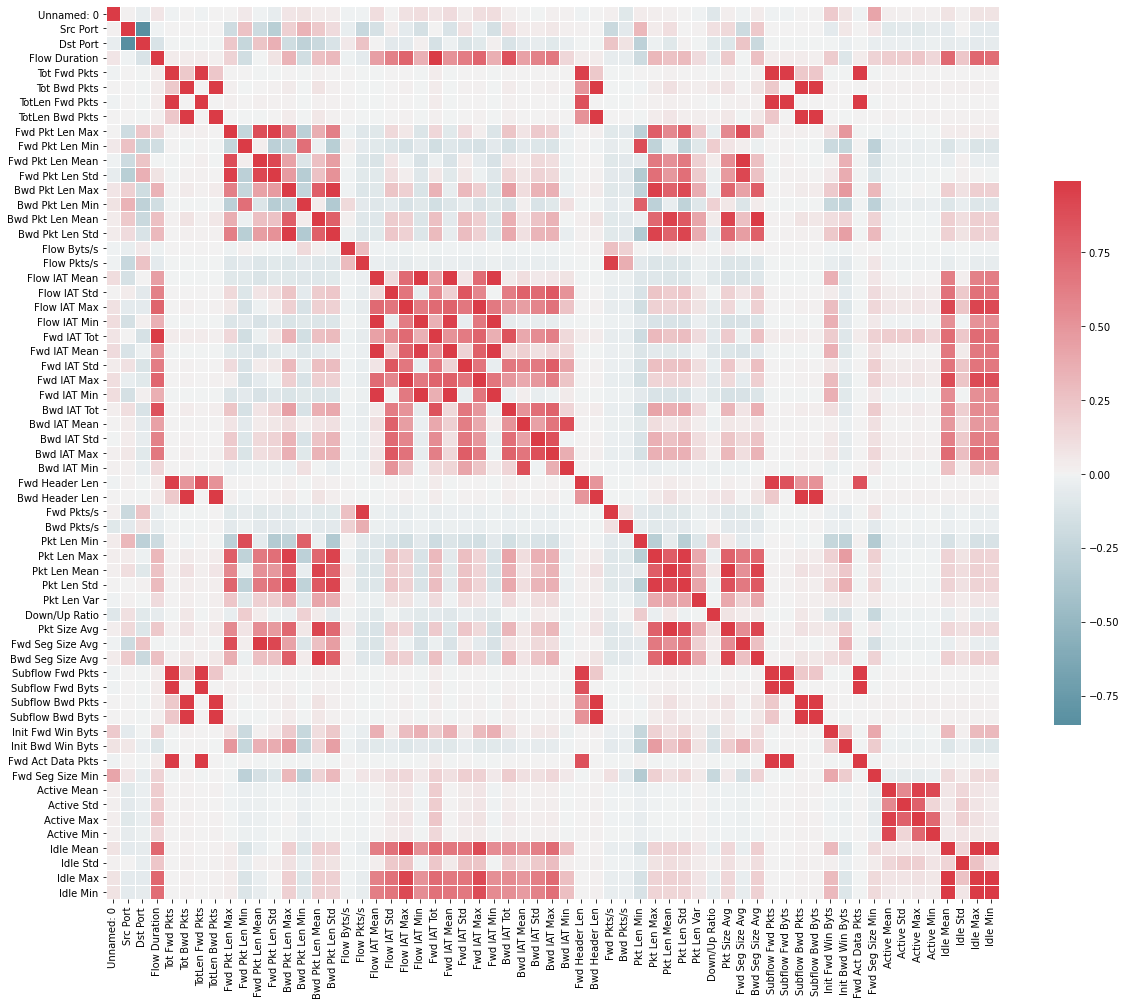

In [15]:
fig, ax = plt.subplots(figsize=(20,20))    
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmax=0.99, center=0, cmap=cmap, square=True, linewidths=1, cbar_kws={'shrink':.5}, ax=ax)
file_name=IMAGE_FOLDER + 'corr.png'
fig.savefig(file_name)

### Distribution of Continous Variables

In [ ]:
n = len(continuous_vars)
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
for i in range(n):
    c = continuous_vars[i]
    print(c)
    try:
        axes[0] = sns.boxplot(x=c, data=df, orient='h')
    except Exception as e:
        print(e)
        print(f'Problems with boxplot -> col: {c}')
    try:
        axes[1] = sns.histplot(x=c, data=df, kde=True, stat='density')
    except:
        print(f'Problems with histplot -> col: {c}')
    fig.suptitle(c, fontsize=16)
    file_name=IMAGE_FOLDER+c.lower().replace(' ', '_').replace(':', '').replace('/', '_') + '.png'
    fig.savefig(file_name)
    print('[' + (i+1) * '=' + '>' + (n-i-1) * ' ' + ']' + '\t\t' + f'{i+1}/{n}', end='\n')

### Distribution of Categorical Variables

In [ ]:
df_c = df[category_vars]
n = len(category_vars)

In [ ]:
for i in range(n):
    c = category_vars[i]
    fig, axes = plt.subplots(ncols=1, figsize=(5,5))
    sns.countplot(x=c, hue='Label', data=df_c, ax=axes)
    file_name=IMAGE_FOLDER+c.lower().replace(' ', '_').replace(':', '').replace('/', '_') + '.png'
    fig.savefig(file_name)
    print('[' + (i+1) * '=' + '>' + (n-i-1) * ' ' + ']' + '\t\t' + f'{i+1}/{n}', end='\r')

In [112]:
# pivot tables for all categorical values in dependence of the label
func = lambda x: round(100*x.count()/df_c.shape[0],2)
for i in range(1, n):
    c = category_vars[i]
    print(' '*100, end='\r')
    print(pd.pivot_table(df_c[['Label', c]], index='Label', columns=c, aggfunc=func)['Label'], '\n\n')
    print('[' + (i+1) * '=' + '>' + (n-i-1) * ' ' + ']' + '\t\t' + f'{i+1}/{n}', end='\r')

Protocol    0      6      17
Label                       
Benign    1.53  52.49  28.88
ddos       NaN  17.09   0.01 


Fwd PSH Flags      0     1
Label                     
Benign         81.79  1.11
ddos           16.82  0.29 


Bwd PSH Flags      0     1
Label                     
Benign         76.91  5.98
ddos           13.75  3.36 


FIN Flag Cnt      0      1
Label                     
Benign        68.14  14.76
ddos          13.47   3.63 


SYN Flag Cnt      0      1
Label                     
Benign        61.97  20.93
ddos           4.14  12.96 


RST Flag Cnt      0     1
Label                    
Benign        82.54  0.36
ddos          17.09  0.01 


PSH Flag Cnt      0      1
Label                     
Benign        52.77  30.13
ddos          16.33   0.78 


ACK Flag Cnt      0     1
Label                    
Benign        82.90  0.00
ddos          14.24  2.87 


URG Flag Cnt      0     1
Label                    
Benign        79.67  3.23
ddos          17.10   NaN 


CWE F

In [ ]:
# distribution of categories of variables
for i in range(n):
    c = category_vars[i]
    values = df[c].value_counts().compute()
    values = round(values/sum(values),4)
    print(' '*100, end='\r')
    print(values, end='\n')
    print('[' + (i+1) * '=' + '>' + (n-i-1) * ' ' + ']' + '\t\t' + f'{i+1}/{n}', end='\r')

### Statistical Tests

**Chi-2-Test**
- 0-Hypothesis: The Variables are stochastic independent of each other.
- p-value: If the p-Value is above 0.95 or 95%, we reject the 0-Hypothesis.
- invalidity: If a cell of the contingency table is below 5, this test results in invalid assumptions. 

In [ ]:
label = df['Label']
for i in range(n):
    c = category_vars[i]
    cat = df[c]
    crosstab = pd.crosstab(label, cat, normalize='index')
    chi2, p, dof, expected = chi2_contingency(crosstab.values)
    print(' '*100, end='\r')
    print(f'{c:15s}: Chi-square Statistic {chi2:5.5f} with p-value {p:5.5f}')
    print('[' + (i+1) * '=' + '>' + (n-i-1) * ' ' + ']' + '\t\t' + f'{i+1}/{n}', end='\r')

**Student t-test**
- 0-Hypothesis: Both independent variables/samples have identical average (and therefore are dependent).
- p-value: If the p-Value is above 0.05 or 95%, we reject the 0-Hypothesis.

In [ ]:
n = len(continuous_vars)
for i in range(n):
    c = continuous_vars[i]
    a = df[df['Label'] == 'Benign'][c]
    b = df[df['Label'] == 'ddos'][c]
    ttest, p = ttest_ind(a, b)
    print(' '*100, end='\r')
    print(f'{c:15s}: T-test Statistic {ttest:5.5f} with p-value {p:5.5f}')
    print('[' + (i+1) * '=' + '>' + (n-i-1) * ' ' + ']' + '\t\t' + f'{i+1}/{n}', end='\r')

---
## Cleaning

In [8]:
to_be_removed = ['Fwd PSH Flags', 'Bwd PSH Flags', 'FIN Flag Cnt', 'URG Flag Cnt', 'Src Port', 'Dst Port', 'Flow ID', 'Unnamed: 0', 'Timestamp']

In [9]:
df_drop = df.drop(to_be_removed, axis=1)
df_drop.shape

In [ ]:
df_drop.to_csv('explored_ds.csv', single_file = True, index = False)

---
## df_fast

In [18]:
df_fast = df.sample(frac=0.001, random_state = 1).compute()

In [6]:
df_fast['dst_port_transformed'] = df_fast['Dst Port'].apply(f)
df_fast['src_port_transformed'] = df_fast['Src Port'].apply(f)

In [7]:
df_fast.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
85139,723790,172.31.69.25-18.219.193.20-80-37276-6,18.219.193.20,37276,172.31.69.25,80,6,16/02/2018 11:19:53 PM,37412,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,53.458783,37412.000000,0.000000e+00,37412.0,37412.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,32,32,26.729392,26.729392,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.000000,0.00,1,0,1,0,-1,225,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
108382,3056487,172.31.69.25-18.219.193.20-80-44430-6,172.31.69.25,80,18.219.193.20,44430,6,16/02/2018 11:24:09 PM,4503584,4,4,935.0,376.0,935.0,0.0,233.750000,467.500000,376.0,0.0,94.00,188.0,291.101487,1.776363,643369.142857,1.668937e+06,4427902.0,3.0,75677.0,25225.666667,27464.800351,54499.0,24.0,4449058.0,1.483019e+06,2.550349e+06,4427902.0,5055.0,0,0,136,136,0.888182,0.888182,0.0,935.0,145.666667,321.059185,103079.000000,0,0,0,0,1,0,0,0,1.0,163.875000,233.750000,94.00,4,935,4,376,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
88262,1570420,172.31.69.25-18.219.193.20-80-35550-6,18.219.193.20,35550,172.31.69.25,80,6,16/02/2018 11:26:12 PM,39637,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,50.457905,39637.000000,0.000000e+00,39637.0,39637.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,32,32,25.228953,25.228953,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.000000,0.00,1,0,1,0,-1,225,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
58318,2029566,172.31.69.25-18.219.193.20-80-38160-6,172.31.69.25,80,18.219.193.20,38160,6,16/02/2018 11:16:42 PM,4457736,4,4,935.0,299.0,935.0,0.0,233.750000,467.500000,299.0,0.0,74.75,149.5,276.822136,1.794633,636819.428571,1.646734e+06,4371036.0,8.0,86692.0,28897.333333,25579.606923,48781.0,40.0,4408907.0,1.469636e+06,2.512698e+06,4371036.0,11241.0,0,0,136,136,0.897316,0.897316,0.0,935.0,137.111111,315.125152,99303.861111,0,0,0,0,1,0,0,0,1.0,154.250000,233.750000,74.75,4,935,4,299,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
23259,174912,172.31.69.25-18.218.229.235-80-51927-6,18.218.229.235,51927,172.31.69.25,80,6,20/02/2018 10:50:34,1327853,3,4,20.0,964.0,20.0,0.0,6.666667,11.547005,964.0,0.0,241.00,482.0,741.045884,5.271668,221308.833300,5.419321e+05,1327523.0,2.0,300.0,150.000000,209.303607,298.0,2.0,1327849.0,4.426163e+05,7.663517e+05,1327523.0,26.0,0,0,72,92,2.259286,3.012382,0.0,964.0,123.000000,339.887376,115523.428600,0,0,1,1,0,0,0,1,1.0,140.571429,6.666667,241.00,3,20,4,964,8192,211,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [93]:
label = df_fast['Label']
for c in category_vars:
    cat = df_fast[c]
    crosstab = pd.crosstab(label, cat, normalize='index')
    chi2, p, dof, expected = chi2_contingency(crosstab.values)
    print(f'{c}: Chi-square Statistic {chi2} with p-value {p}')

Label: Chi-square Statistic 0.0 with p-value 1.0
Protocol: Chi-square Statistic 0.45685763630990195 with p-value 0.7957829404864364
Fwd PSH Flags: Chi-square Statistic 17.200313573699002 with p-value 3.3638082498934515e-05
Bwd PSH Flags: Chi-square Statistic 270.67483326433126 with p-value 8.087847473445057e-61
FIN Flag Cnt: Chi-square Statistic 37.67795177951062 with p-value 8.344238576151004e-10
SYN Flag Cnt: Chi-square Statistic 3.3401289939027867 with p-value 0.06760930856773141
RST Flag Cnt: Chi-square Statistic 3.656731025697325 with p-value 0.055843097753037384
PSH Flag Cnt: Chi-square Statistic 1.4614767960443633 with p-value 0.22669529317807335
ACK Flag Cnt: Chi-square Statistic 0.5017327669422598 with p-value 0.47873974731805746
URG Flag Cnt: Chi-square Statistic 22.403816669344465 with p-value 2.2093453183937247e-06
CWE Flag Count: Chi-square Statistic 4.677085098704607 with p-value 0.030567574258334833
ECE Flag Cnt: Chi-square Statistic 2.9041087510776933 with p-value 0.088

In [11]:
for c in continuous_vars:
    a = df_fast[df_fast['Label'] == 'Benign'][c]
    b = df_fast[df_fast['Label'] == 'ddos'][c]
    ttest, p = ttest_ind(a, b)
    print(f'{c}: T-test Statistic {ttest} with p-value {p}')

Unnamed: 0: T-test Statistic 39.60580628044775 with p-value 0.0
Src Port: T-test Statistic 20.002190933170574 with p-value 9.039997980684146e-87
Dst Port: T-test Statistic -21.608262585767196 with p-value 1.586697930228524e-100
Flow Duration: T-test Statistic 11.150789721241512 with p-value 1.1871121452178064e-28
Tot Fwd Pkts: T-test Statistic 3.39508632553737 with p-value 0.0006896032672387554
Tot Bwd Pkts: T-test Statistic 1.5704074025172738 with p-value 0.11636225508079845
TotLen Fwd Pkts: T-test Statistic -1.9640301954707957 with p-value 0.04956321440538919
TotLen Bwd Pkts: T-test Statistic 1.0858414231823688 with p-value 0.27758381473170585
Fwd Pkt Len Max: T-test Statistic -22.427713970781642 with p-value 6.642762286917927e-108
Fwd Pkt Len Min: T-test Statistic 18.53598073953681 with p-value 4.804997194442264e-75
Fwd Pkt Len Mean: T-test Statistic -25.76223618384981 with p-value 2.366747406553255e-140
Fwd Pkt Len Std: T-test Statistic -36.787275815905204 with p-value 1.1484881301

In [19]:
df_fast = df_fast.drop(to_be_removed, axis=1)
df_fast.shape